# Stack Overflow Developer Survey 2023 Data Analysis

## Introduction
In this notebook, we will explore and analyze the Stack Overflow Developer Survey 2023 data. 

#### Data Collection
- Dataset Source - https://insights.stackoverflow.com/survey

#### Setup
Ensure that you have the necessary tools and libraries installed. You may use Python with Pandas, NumPy, and other relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="darkgrid")
sns.set_palette("Set2")
from IPython.display import display
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
from plotly import graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

#### Data Loading

In [2]:
df = pd.read_csv("survey_results_public.csv")

#### Data Exploration

In [3]:
# Display the first few rows of the dataset
df.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


In [4]:
# Display the shape of the dataset
df.shape

(89184, 84)

In [5]:
# Display the column names
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

#### Data Cleaning

##### Selecting Relevant Columns

In [7]:
# Selecting columns of interest
selected_columns = ['Country', 'Age', 'EdLevel', 'LearnCode', 'CodingActivities', 'Employment', 'RemoteWork', 'DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'Industry', 'OrgSize', 'YearsCodePro', 'ConvertedCompYearly']
df = df[selected_columns]

##### Handling Missing Values and Duplicates

In [8]:
# Display null value counts
print(df.isnull().sum())

Country                    1211
Age                           0
EdLevel                    1211
LearnCode                  1521
CodingActivities          15420
Employment                 1286
RemoteWork                15374
DevType                   12312
LanguageHaveWorkedWith     2044
DatabaseHaveWorkedWith    15749
PlatformHaveWorkedWith    25556
WebframeHaveWorkedWith    22246
Industry                  52410
OrgSize                   24141
YearsCodePro              23048
ConvertedCompYearly       41165
dtype: int64


- I will keep the missing values for future use.

In [9]:
# Check and print the number of duplicated rows 
print(df.duplicated().sum())

1212


In [10]:
# Display rows where duplicate records are found
print(df[df.duplicated(keep= False) == True].sample(5))

      Country                 Age EdLevel LearnCode CodingActivities  \
88451     NaN     25-34 years old     NaN       NaN              NaN   
33023     NaN     25-34 years old     NaN       NaN              NaN   
74122     NaN  Under 18 years old     NaN       NaN              NaN   
58569     NaN     35-44 years old     NaN       NaN              NaN   
68606     NaN  Under 18 years old     NaN       NaN              NaN   

      Employment RemoteWork DevType LanguageHaveWorkedWith  \
88451        NaN        NaN     NaN                    NaN   
33023        NaN        NaN     NaN                    NaN   
74122        NaN        NaN     NaN                    NaN   
58569        NaN        NaN     NaN                    NaN   
68606        NaN        NaN     NaN                    NaN   

      DatabaseHaveWorkedWith PlatformHaveWorkedWith WebframeHaveWorkedWith  \
88451                    NaN                    NaN                    NaN   
33023                    NaN          

- No duplicate entries were found.

#### Data Formatting

In [134]:
# Convert 'YearsCodePro' to numeric, handling errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [135]:
# Rename 'ConvertedCompYearly' to 'Salary'
df.rename(columns={'ConvertedCompYearly': 'Salary'}, inplace=True)

In [136]:
# Define salary bins. 
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 2000000, float('inf')]

# Define labels for the salary bins. 
labels = ['Under 20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-120K', '120K-140K', '140K-160K', '160K-180K', '180K-200K', 'Over 200K']

# Use the `pd.cut` function to categorize each salary column based on the bins and labels.
df['Salary_Bin'] = pd.cut(df['Salary'], bins=bins, labels=labels, right=False)

## Data Visualization and Analysis

#### Functions for Data Visualization and Analysis

In [137]:
def prepare_plot_data(data, column, max_unique_values=None):
    data = data.dropna(subset=[column])
    value_counts = data[column].value_counts()
    percentages = ((value_counts / len(data)) * 100).round(2)

    if max_unique_values is not None and len(value_counts) > max_unique_values:
        value_counts = value_counts.head(max_unique_values)
        percentages = percentages.head(max_unique_values)

    plot_data = pd.DataFrame({
        column: value_counts.index,
        'Count': value_counts.values,
        'Percentage': percentages.values
    })

    return plot_data

def plot_generic(data, column, plot_type, width, height, showlegend=None, max_unique_values=None):
    plot_data = prepare_plot_data(data, column, max_unique_values)
    # Customize scatter plot
    if plot_type == 'scatter':
        fig = px.scatter(plot_data, 
                     x=column, 
                     y='Count', 
                     size='Count', 
                     color=column,
                     hover_data=['Percentage'],
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column, 
                     size_max=60 
        )
        # Customize funnel plot
    elif plot_type == 'funnel':
        fig = px.funnel(plot_data, 
                     x=column, 
                     y='Count', 
                     color=column,
                     hover_data=['Percentage'],
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column,
                     text=plot_data['Percentage'].apply(lambda x: f'{x:.2f}%')  
        )
        # Customize funnel area plot
    elif plot_type == 'funnel_area':
        fig = px.funnel_area(plot_data, 
                     names=column, 
                     values='Count', 
                     color=column,
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column,    
        )
        # Customize pie plot
    elif plot_type == 'pie':
        fig = px.pie(plot_data, 
                     names=column, 
                     values='Count', 
                     color=column,
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column, 
        )
        # Customize bar plot
    elif plot_type == 'bar':
        fig = px.bar(plot_data, 
                     x=column, 
                     y='Count', 
                     color=column,
                     hover_data=['Percentage'],
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column,             
        )
    
    fig.update_layout(
        width=width,
        height=height,
        showlegend=showlegend,
    )
    fig.show()





def count_values(data, column, new_column):
    # Drop missing values
    data = data.dropna(subset=[column])
    
    # Split the values into a list
    data[new_column] = data[column].str.split(';')

    # Flatten the list of values
    all_values = [value for sublist in data[new_column].dropna() for value in sublist]

    # Count the occurrences of each value
    value_counts = pd.Series(all_values).value_counts()

    # Convert the Series to a DataFrame
    df_value_counts = value_counts.reset_index()

    # Rename the columns
    df_value_counts.columns = [new_column, 'Count']

    return df_value_counts


def plot_values_count_distribution(data, column, plot_type,  max_unique_values=None, width=None, height=None, showlegend=None):

    # Calculate the percentages
    value_counts = data[column]
    percentages = ((data['Count'] / data['Count'].sum() * 100).round(2))

    # Filter data if unique values exceed max_unique_values
    if len(value_counts) > max_unique_values:
        value_counts = value_counts.head(max_unique_values)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        column: value_counts,
        'Count': data['Count'],
        'Percentage': percentages.values
    })

    # Customize pie plot
    if plot_type == 'pie':
        fig = px.pie(plot_data, 
                     names=column, 
                     values='Count', 
                     color=column,
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column, 
        )
    # Customize bar plot
    elif plot_type == 'bar':
        fig = px.bar(plot_data, 
                     x=column, 
                     y='Count', 
                     color=column,
                     hover_data=['Percentage'],
                     labels={column: column, 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                     title=f"Distribution of {column}",
                     hover_name=column,             
        )
    fig.update_layout(
        width=width,
        height=height,
        showlegend=showlegend,
    )
    fig.show()



def plot_language_distribution(data, column, lang_col, target,  max_unique_values=None, width=None, height=None, plot_title=None):

    # Drop missing values
    data = data.dropna(subset=[column])
    
    # Extract relevant columns and split the language column
    languages_df = data[[column, lang_col]].copy()
    languages_df = languages_df[lang_col].str.get_dummies(sep=';')

    # Get the list of languages from the columns of languages_df
    languages = languages_df.columns.tolist()

    # Filter rows based on target developer types
    target_dfs = [languages_df[data[column] == dev_type] for dev_type in target]

    # Calculate percentages for each language for each target developer type
    counts = [target_df[languages].mean() for target_df in target_dfs]

    # Combine data into a single DataFrame
    combined_df = pd.DataFrame({'Language': languages})
    for i, dev_type in enumerate(target):
        combined_df[dev_type] = counts[i].values

    # Sort the combined DataFrame by Percentage
    combined_df = combined_df.melt(id_vars='Language', var_name='Developer Type', value_name='Percentage')
    combined_df = combined_df.sort_values(by='Percentage', ascending=False)

    # Select the top languages
    top_languages = combined_df.groupby('Language').sum().sort_values(by='Percentage', ascending=False).head(max_unique_values).index
    combined_df = combined_df[combined_df['Language'].isin(top_languages)]

    # Plot the bar chart
    plt.figure(figsize=(width, height))
    sns.barplot(x='Percentage', y='Language', hue='Developer Type', data=combined_df, palette='viridis')
    
    # Set the title using f-string
    title = plot_title if plot_title else f"Most Popular Programming Languages for {', '.join(target)}"
    plt.title(title)
    
    plt.xlabel("Percentage")
    plt.ylabel("Programming Language")
    plt.legend(title='Developer Type')
    plt.show()


def plot_median_relationship(data, x_col, y_col, max_unique_values=None, width=None, height=None):
    plt.figure(figsize=(width, height))
    
    if data[x_col].dtype in ['int64', 'float64'] and data[y_col].dtype in ['int64', 'float64']:
        sns.lineplot(data=data, x=x_col, y=y_col, estimator='median')
    else:
        top_values = data.groupby(y_col)[x_col].median().sort_values(ascending=False).head(max_unique_values).index
        sns.barplot(data=data[data[y_col].isin(top_values)], y=y_col, x=x_col, estimator='median')
    
    plt.xlabel(f'Annual {x_col} in USD')
    plt.ylabel(f'{y_col}')
    plt.title(f'Median Annual {x_col} by {y_col}')
    plt.show()




def plot_salary_distribution(data, country_column, dev_type_column, salary_column, country,  max_unique_values=33, width=None, height=None):
    # Filter data for the specified country
    data_country = data[data[country_column] == country]
    
    # Group by Developer Type and calculate median salary, then sort the values
    data_country = data_country.groupby(dev_type_column)[salary_column].median().sort_values(ascending=False).reset_index().head(max_unique_values)

    # Set up the plot
    plt.figure(figsize=(width, height))
    sns.barplot(x=salary_column, y=dev_type_column, data=data_country, order=data_country[dev_type_column])

    # Add labels, title, and grid
    plt.xlabel('Median Salary')
    plt.ylabel('Developer Type')
    plt.title(f'Median Salary by Developer Type in {country}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()


#### Countries

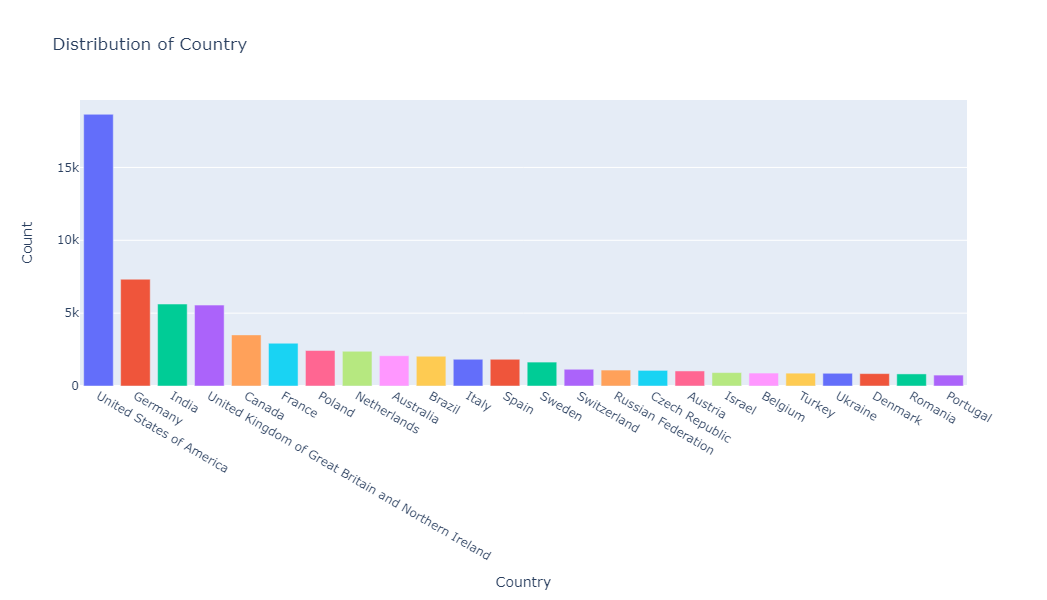

In [138]:
plot_generic(df, 'Country', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Developer type

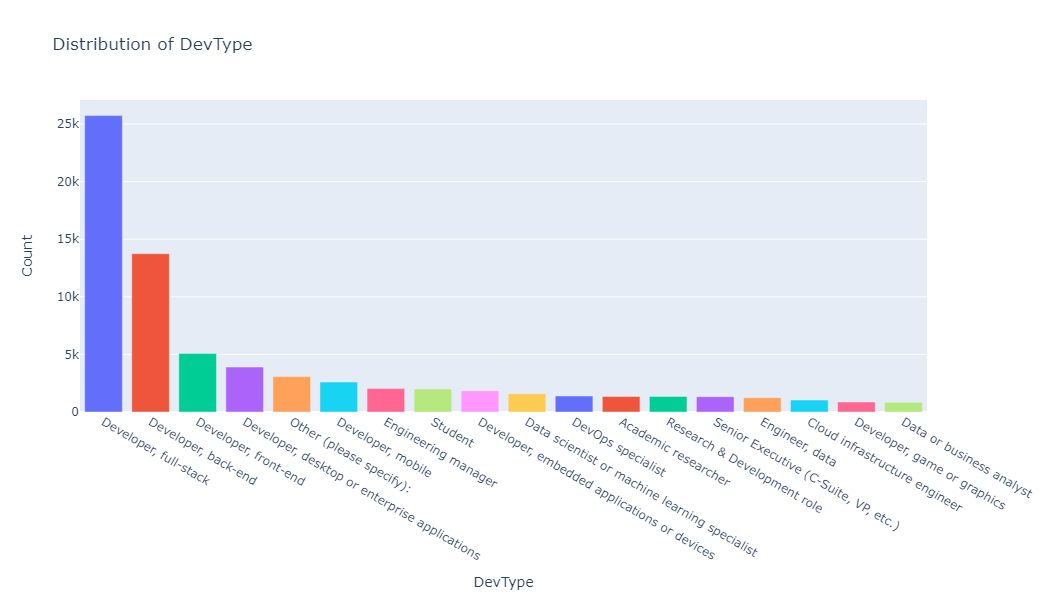

In [139]:
plot_generic(df, 'DevType', 'bar', showlegend=False, max_unique_values=18, width=900, height=600)

#### Industries

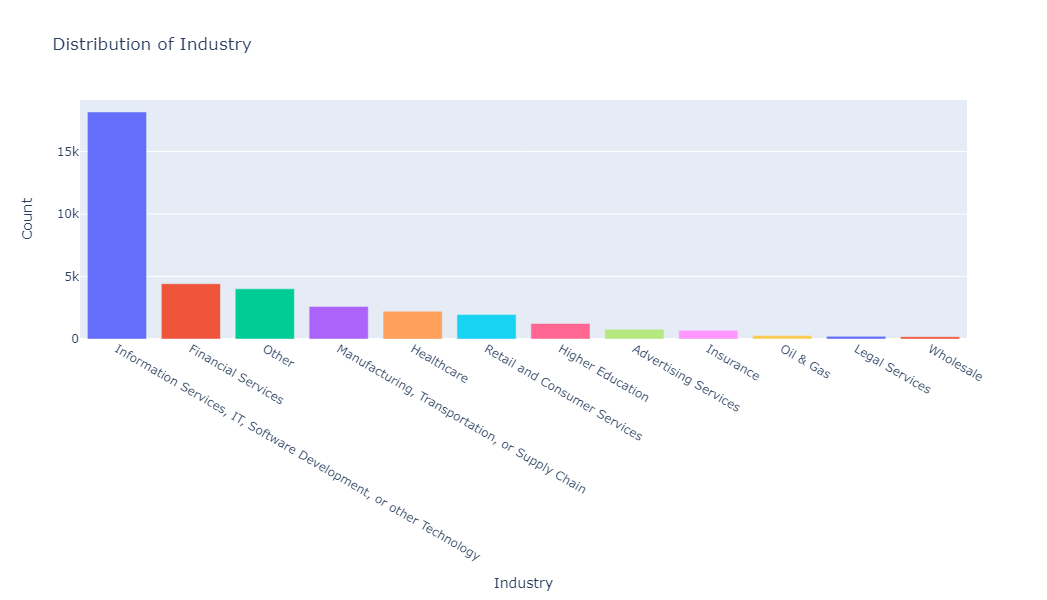

In [140]:
plot_generic(df, 'Industry', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Company size

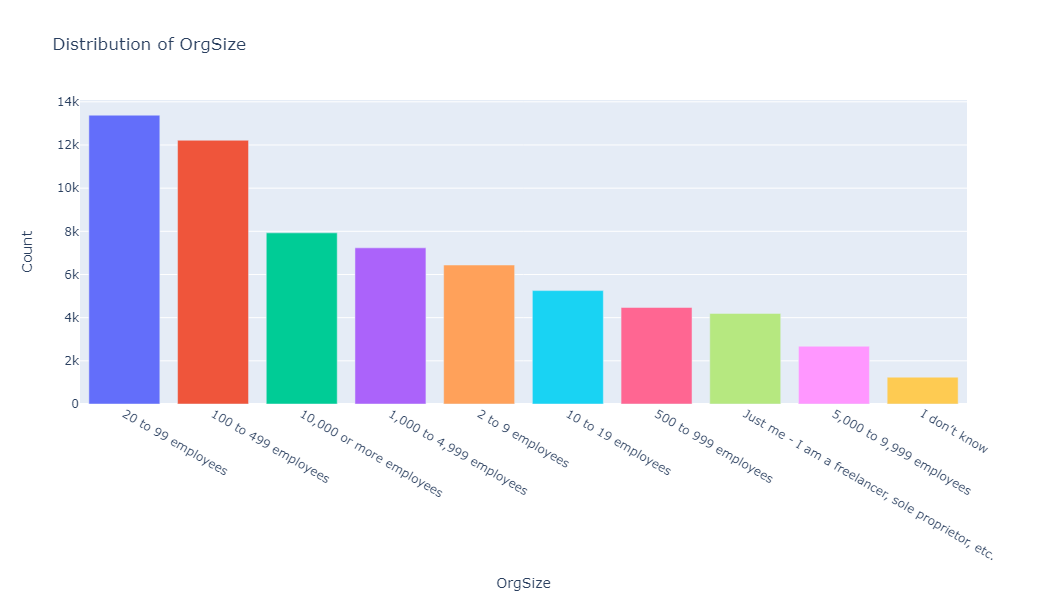

In [141]:
plot_generic(df, 'OrgSize', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Salary

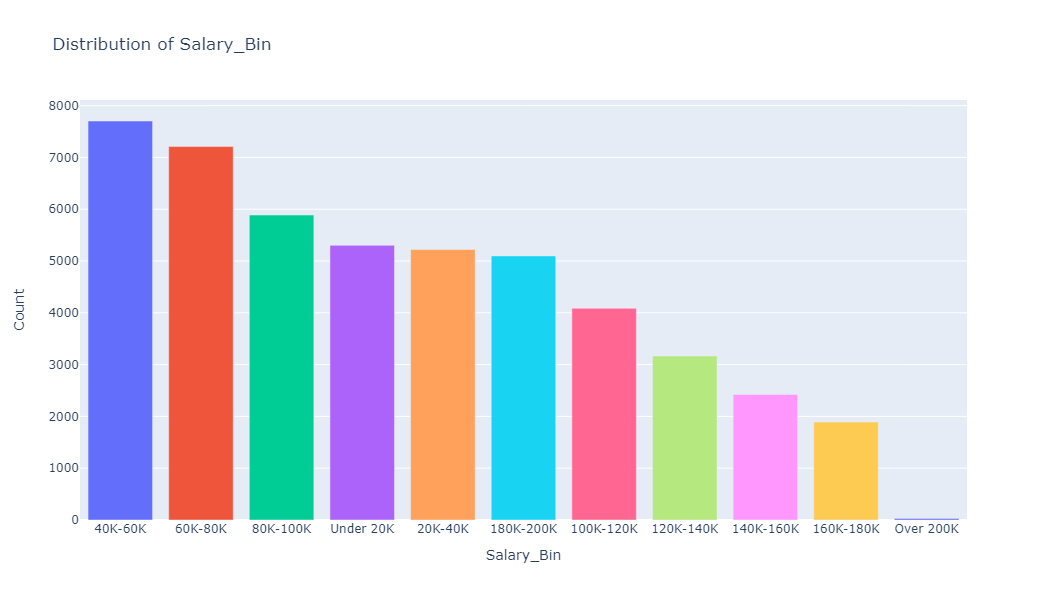

In [142]:
plot_generic(df, 'Salary_Bin', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Age

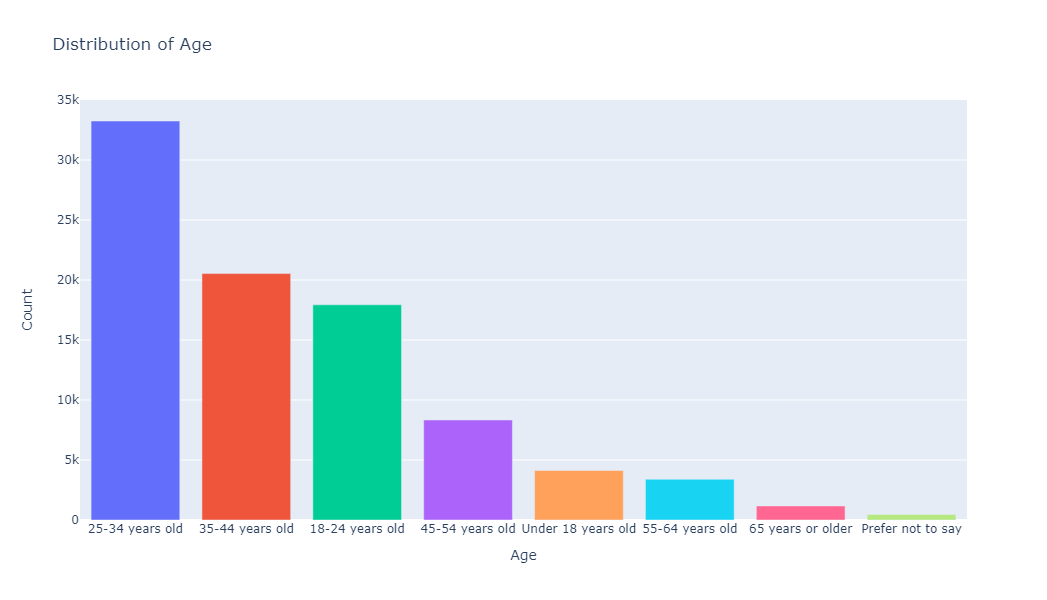

In [143]:
plot_generic(df, 'Age', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Educational attainment

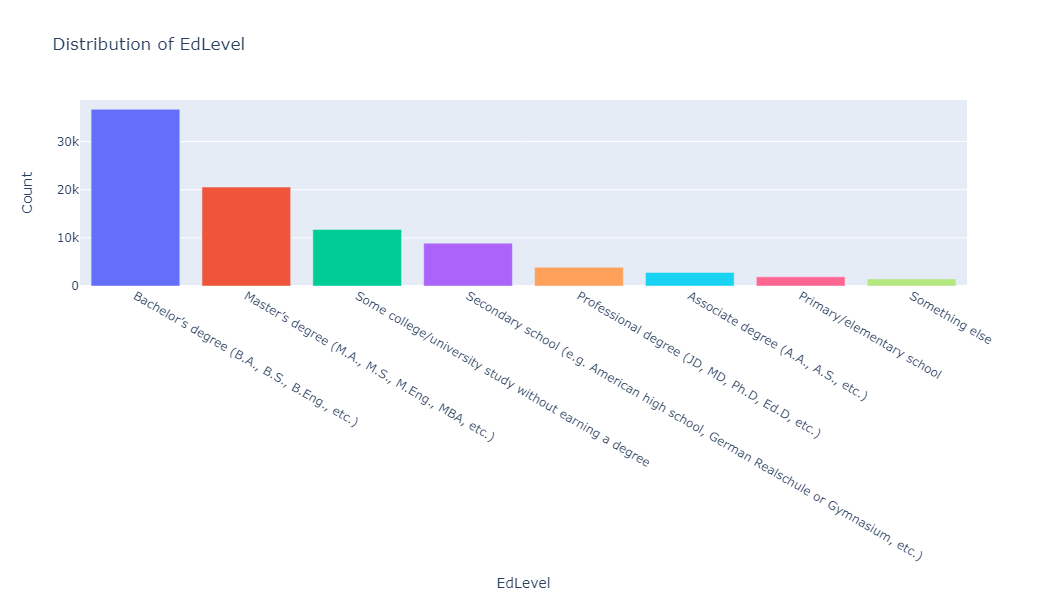

In [144]:
plot_generic(df, 'EdLevel', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Work environment

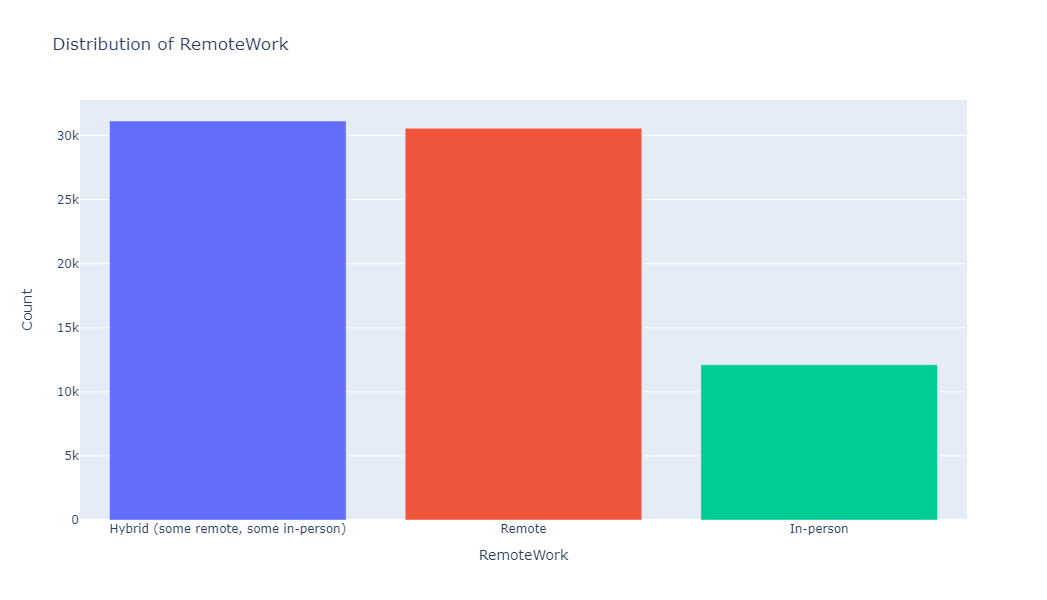

In [145]:
plot_generic(df, 'RemoteWork', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Years coding professionally

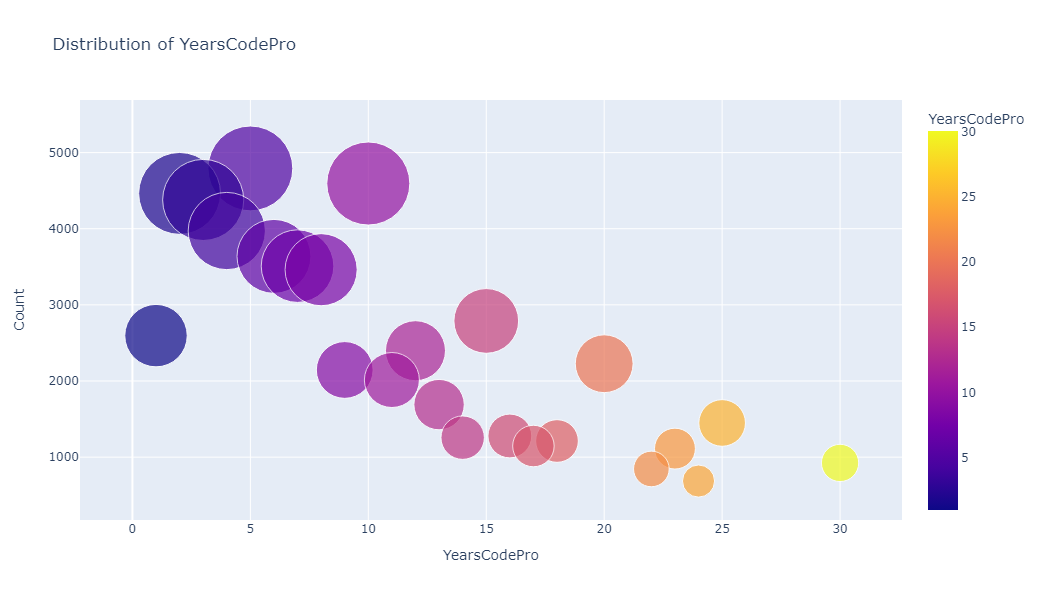

In [146]:
plot_generic(df, 'YearsCodePro', 'scatter', showlegend=False, max_unique_values=24, width=900, height=600)

#### Employment status

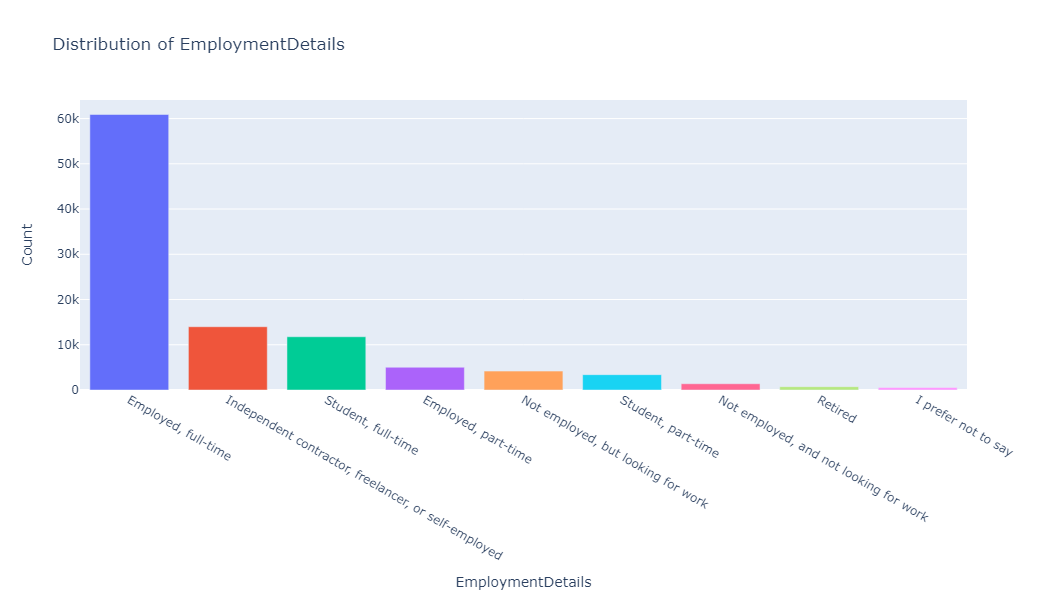

In [147]:
new_df = count_values(df, 'Employment', 'EmploymentDetails')
plot_values_count_distribution(new_df, 'EmploymentDetails', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Programming, scripting, and markup languages

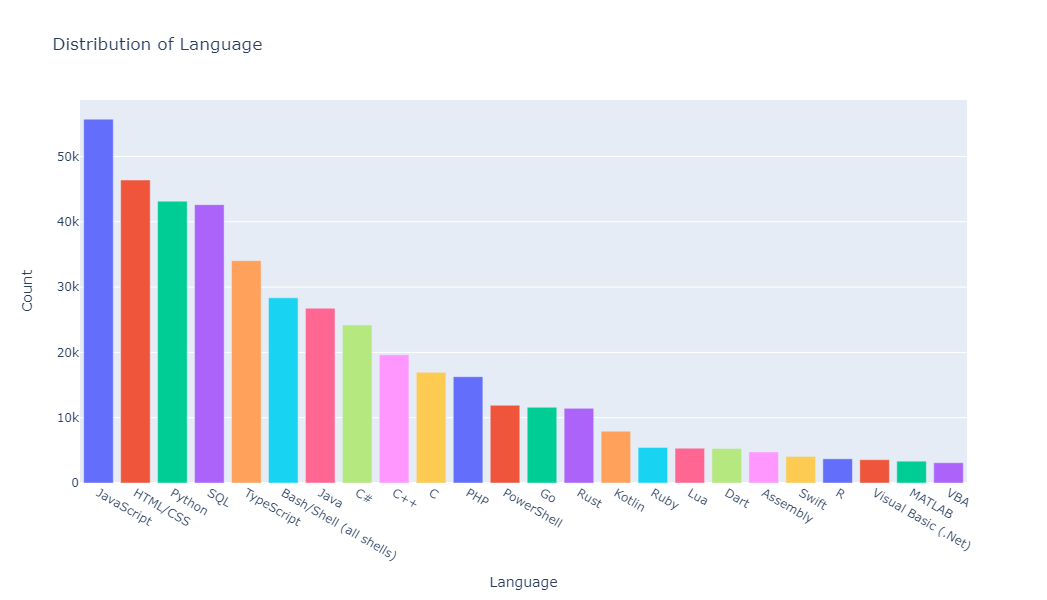

In [148]:
new_df = count_values(df, 'LanguageHaveWorkedWith', 'Language')
plot_values_count_distribution(new_df, 'Language', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Databases

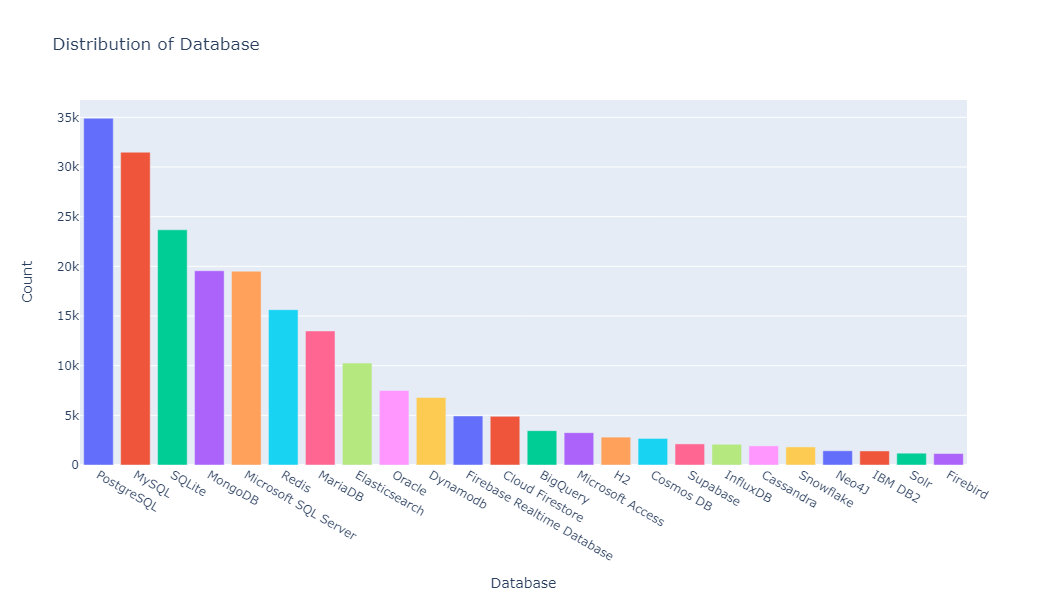

In [149]:
new_df = count_values(df, 'DatabaseHaveWorkedWith', 'Database')
plot_values_count_distribution(new_df, 'Database', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Cloud platforms

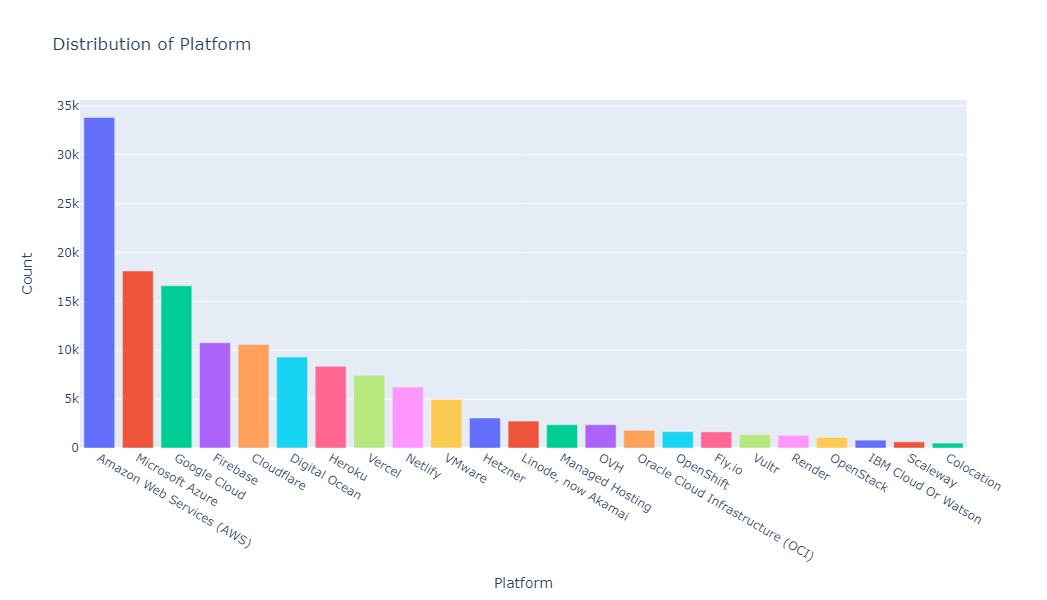

In [150]:
new_df = count_values(df, 'PlatformHaveWorkedWith', 'Platform')
plot_values_count_distribution(new_df, 'Platform', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Web frameworks and technologies

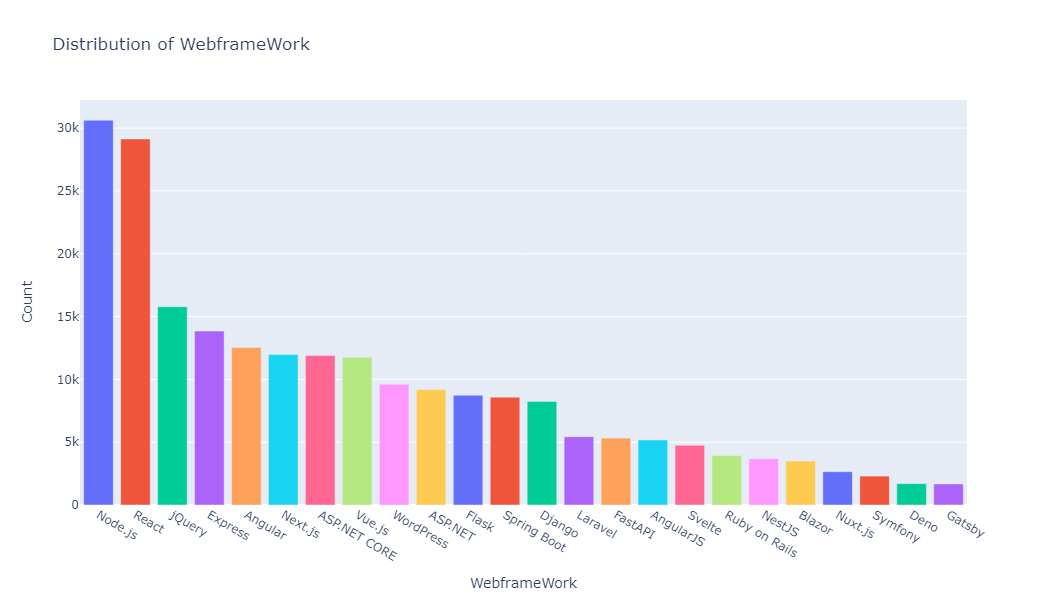

In [151]:
new_df = count_values(df, 'WebframeHaveWorkedWith', 'WebframeWork')
plot_values_count_distribution(new_df, 'WebframeWork', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Learning how to code

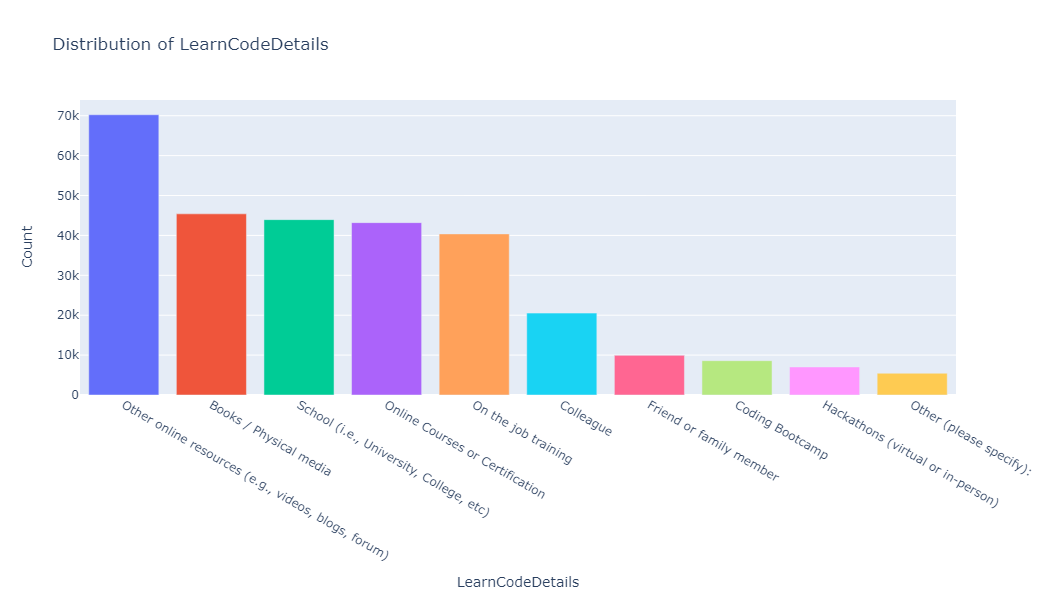

In [152]:
new_df = count_values(df, 'LearnCode', 'LearnCodeDetails')
plot_values_count_distribution(new_df, 'LearnCodeDetails', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Coding outside of work

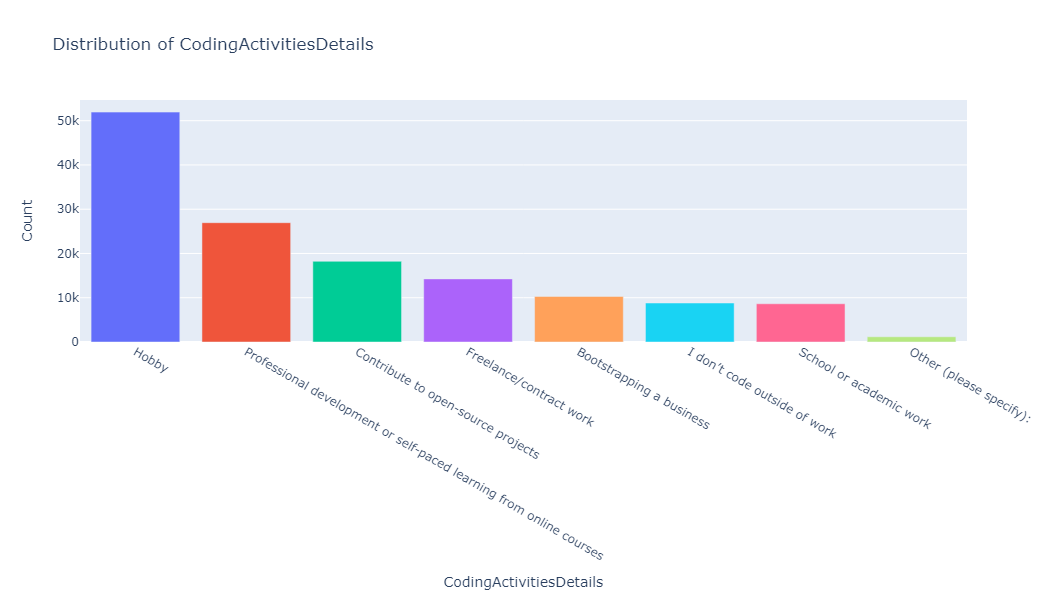

In [153]:
new_df = count_values(df, 'CodingActivities', 'CodingActivitiesDetails')
plot_values_count_distribution(new_df, 'CodingActivitiesDetails', 'bar', showlegend=False, max_unique_values=24, width=900, height=600)

#### Language Distribution Among Developers

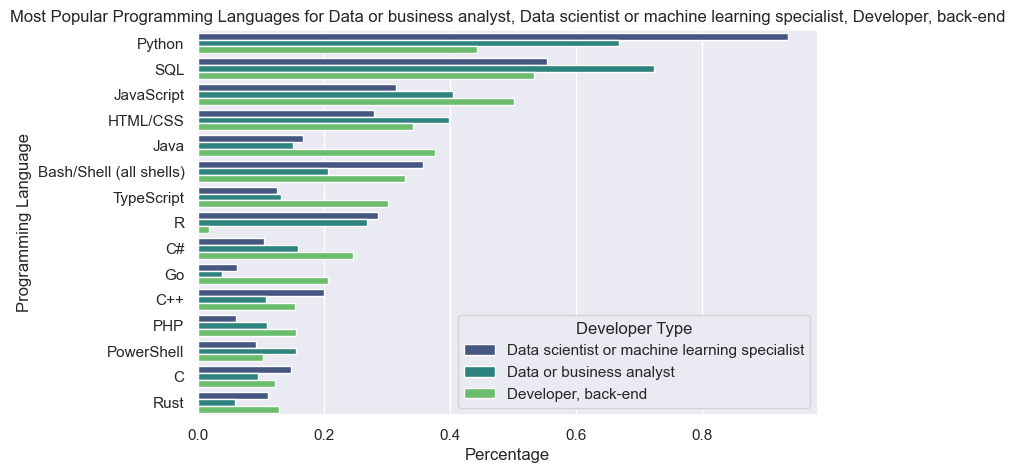

In [154]:
plot_language_distribution(df, 'DevType', 'LanguageHaveWorkedWith', 
    ['Data or business analyst', 'Data scientist or machine learning specialist', 'Developer, back-end'],  
    plot_title=None,  max_unique_values=15, width=8, height=5)

### Median Salary Relationships

#### Country vs. Salary

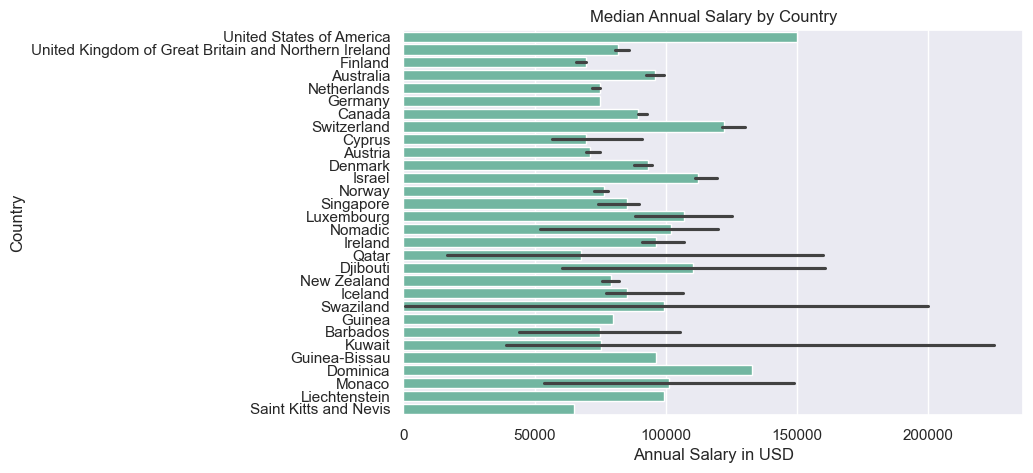

In [155]:
plot_median_relationship(df, "Salary", "Country",  width=8, height=5, max_unique_values=30)

#### Developer Type vs. Salary

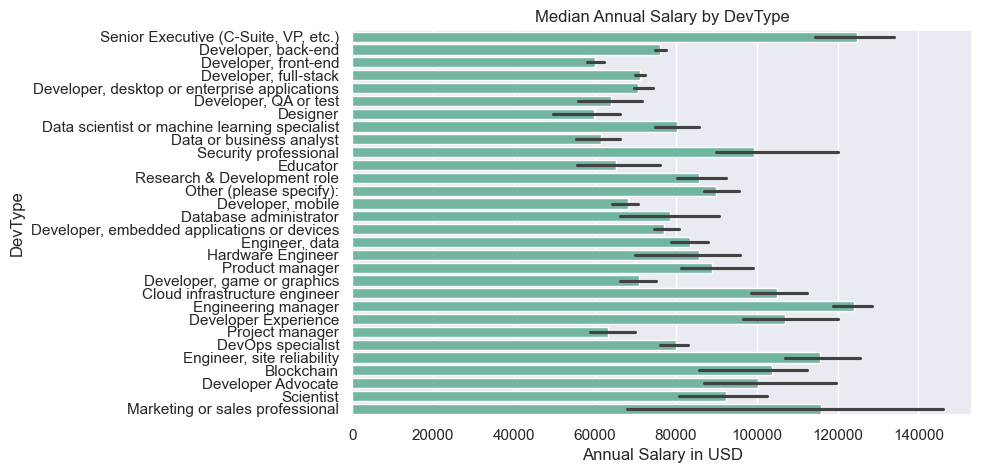

In [156]:
plot_median_relationship(df, "Salary", "DevType",  width=8, height=5, max_unique_values=30)

#### Industry vs. Salary

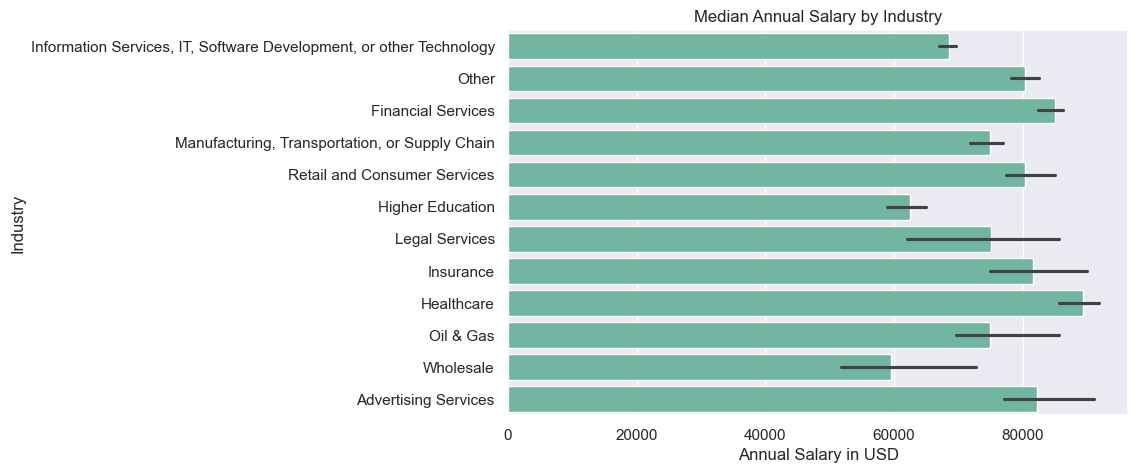

In [157]:
plot_median_relationship(df, "Salary", "Industry",  width=8, height=5, max_unique_values=30)

#### Organization Size vs. Salary

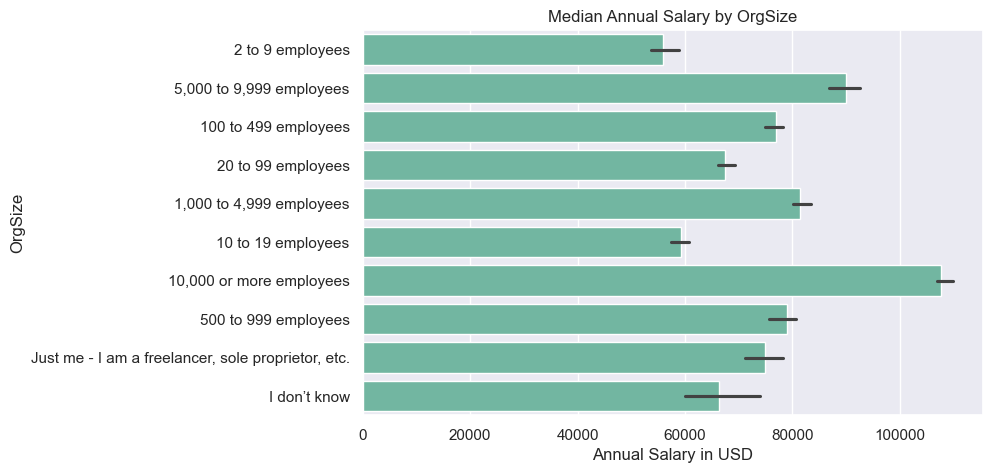

In [158]:
plot_median_relationship(df, "Salary", "OrgSize",  width=8, height=5, max_unique_values=30)

#### Age vs. Salary

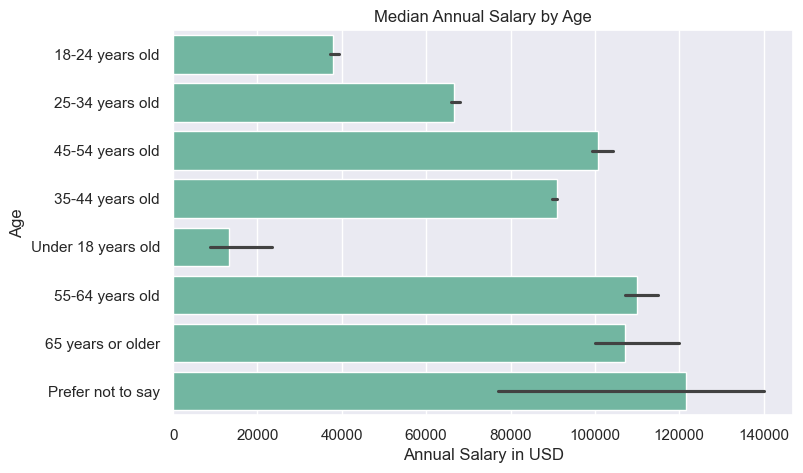

In [159]:
plot_median_relationship(df, "Salary", "Age",  width=8, height=5, max_unique_values=30)

#### Education Level vs. Salary

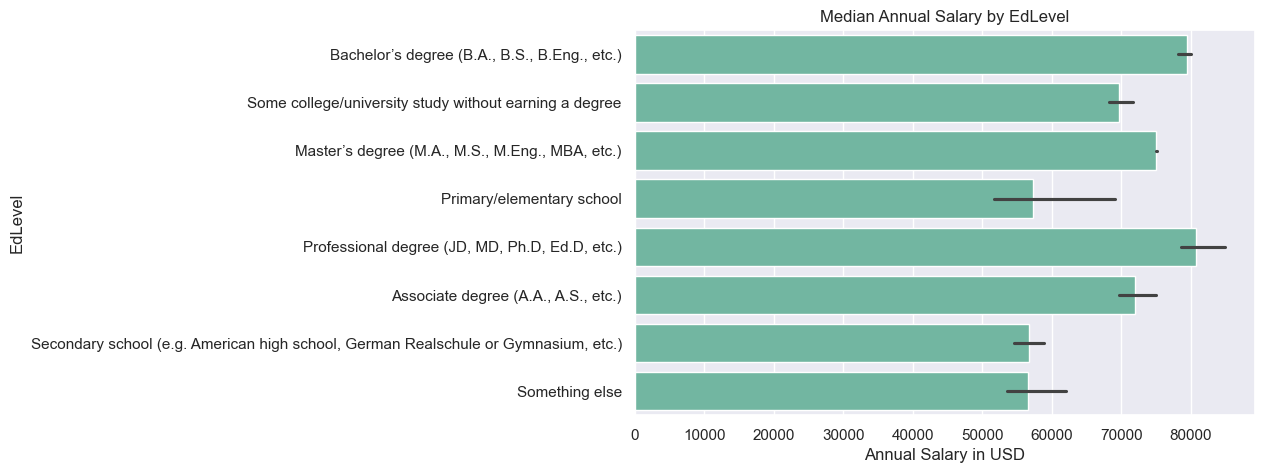

In [160]:
plot_median_relationship(df, "Salary", "EdLevel",  width=8, height=5, max_unique_values=30)

#### Remote Work vs. Salary

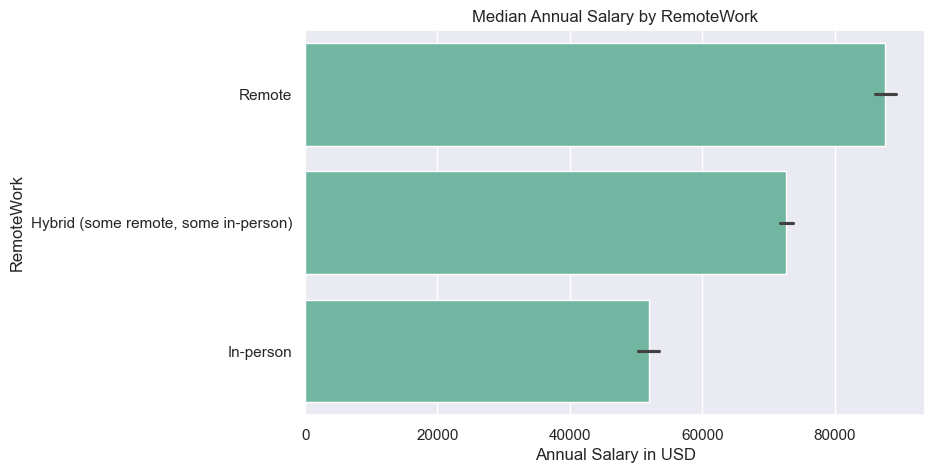

In [161]:
plot_median_relationship(df, "Salary", "RemoteWork",  width=8, height=5, max_unique_values=30)

#### Years of Professional Coding vs. Salary

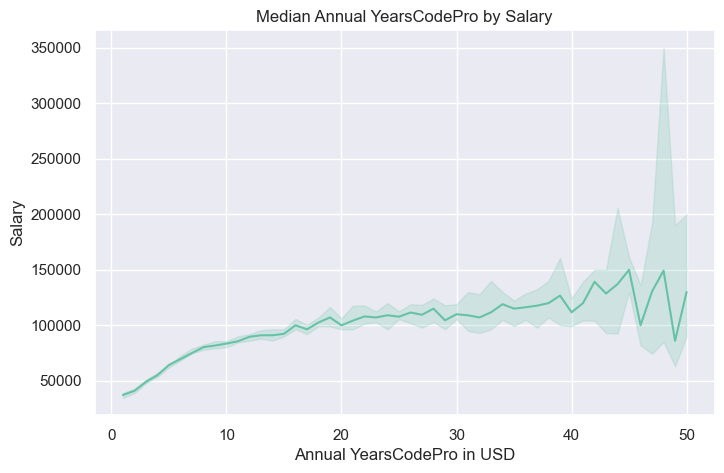

In [162]:
plot_median_relationship(df, "YearsCodePro", "Salary",  width=8, height=5, max_unique_values=30 )

### Salary Distribution for Specific Countries and Developer Types

#### United States of America

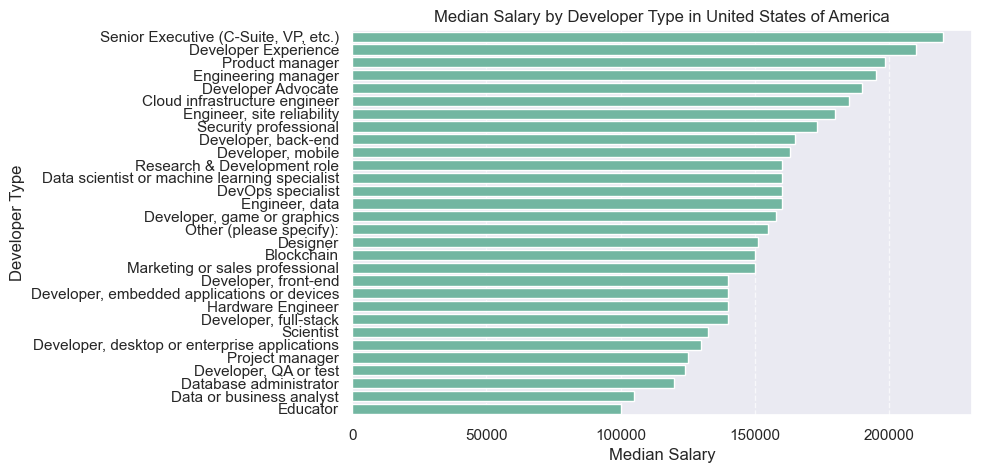

In [163]:
plot_salary_distribution(df, 'Country', 'DevType', 'Salary', 'United States of America',  width=8, height=5, max_unique_values=30)

#### Morocco

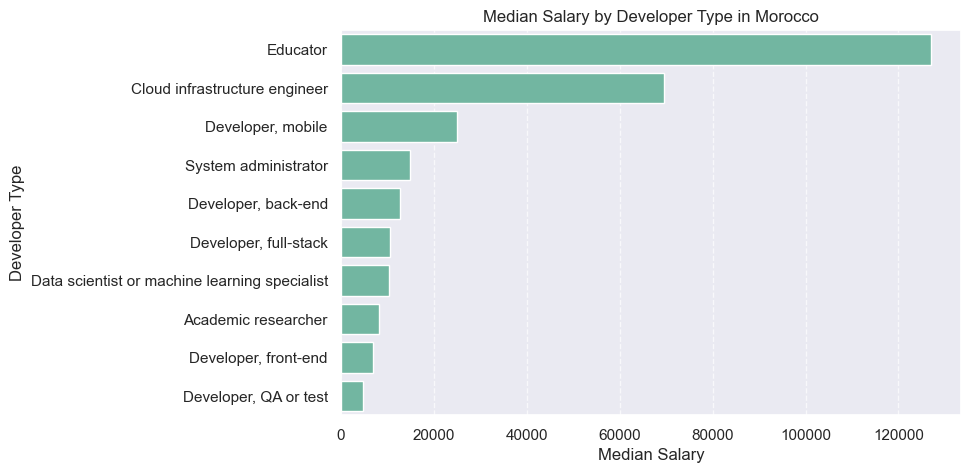

In [164]:
plot_salary_distribution(df, 'Country', 'DevType', 'Salary', 'Morocco',  width=8, height=5, max_unique_values=10)

## Survey Insights

- **Geography:**

  - The survey garnered significant participation from the United States and Germany, accounting for a collective 30% of the total responses. Following closely behind are India and the UKI.

- **Occupations:**
  - The majority of respondents primarily identify as developers specializing in full-stack, back-end, front-end, and desktop/enterprise applications, highlighting the dominance of these roles in the survey findings.
  
- **Industries:**
  - The IT sector leads the survey with 49% of participants, closely followed by financial services.
  - Notably, 20% of respondents are affiliated with organizations boasting fewer than 100 employees.
  
- **Income Distribution:**
  - The income distribution is diverse, with 43% of respondents earning between `$40,000 and $100,000`.

- **Age Distribution:**
  - A significant demographic trend emerges, as 37% of professional developers fall within the 25-34 age range.
  
- **Educational Backgrounds:**
  - Educational backgrounds vary, with 42% holding bachelor's degrees and 26% possessing master's degrees.

#### Work Dynamics

- **Work Arrangements:**
  - Hybrid and remote work arrangements are preferred, overshadowing face-to-face work.
  - The majority of respondents (58%) have less than a decade of professional coding experience.
  - Full-time employment is predominant, with 60% reporting full-time status.

#### Programming Landscape

- **Programming Languages:**
  - In the programming landscape, JavaScript takes the lead, followed by Python in second place, with SQL securing the third spot.
  
- **Databases:**
  - PostgreSQL has surpassed MySQL as the most popular database.
  
- **Cloud Platforms:**
  - AWS emerges as the top choice for cloud platforms.

- **Web Technologies:**
  - Node.js and React.js lead the pack in web technologies.

#### Learning and Hobbies

- **Learning to Code:**
  - Learning to code predominantly occurs through online resources for a majority of respondents (23.83%).
  
- **Coding as a Hobby:**
  - Outside regular work hours, coding serves as both a hobby (37%) and a means for professional development or self-study (19%).

#### Salaries

- **Global Trends:**
  - U.S. developers command the highest median incomes, with senior positions and roles focused on developer experience often being the most lucrative.
  - In the healthcare industry, developers also boast the highest median salaries.

- **Regional Highlights:**
  - In Morocco, educators and cloud infrastructure engineers stand out for their competitive compensation packages.
  
- **Determinants of Higher Salaries:**
  - The survey underscores the continued significance of years of professional coding experience as a key determinant of higher salaries.
